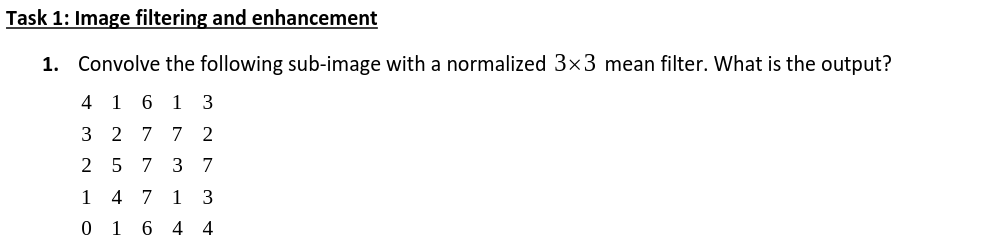

In [12]:

import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter,convolve
from PIL import Image

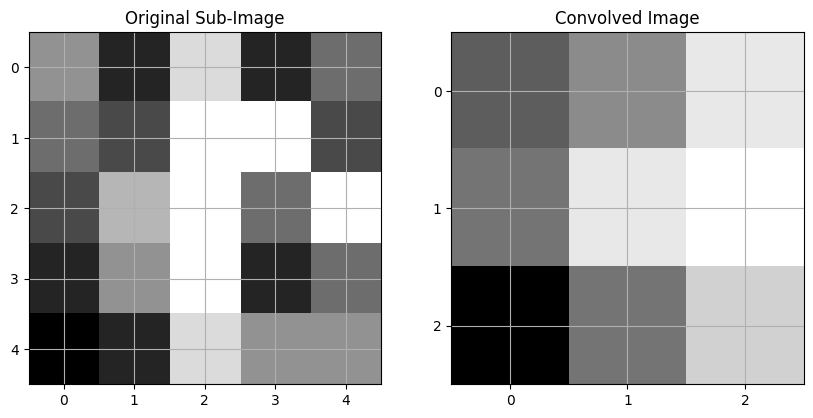

In [6]:
# Define the sub-image
sub_image = np.array([
    [4, 1, 6, 1, 3],
    [3, 2, 7, 7, 2],
    [2, 5, 7, 3, 7],
    [1, 4, 7, 1, 3],
    [0, 1, 6, 4, 4]
])

# Define the normalized 3x3 mean filter
mean_filter = np.ones((3, 3)) / 9

# Perform the convolution
output = convolve2d(sub_image, mean_filter, mode='valid')

# Plot the original and convolved images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axs[0].imshow(sub_image, cmap='gray', interpolation='none')
axs[0].set_title('Original Sub-Image')
axs[0].set_xticks(np.arange(sub_image.shape[1]))
axs[0].set_yticks(np.arange(sub_image.shape[0]))
axs[0].grid(True)

# Plot the convolved image
axs[1].imshow(output, cmap='gray', interpolation='none')
axs[1].set_title('Convolved Image')
axs[1].set_xticks(np.arange(output.shape[1]))
axs[1].set_yticks(np.arange(output.shape[0]))
axs[1].grid(True)

plt.show()

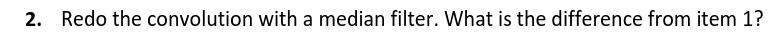

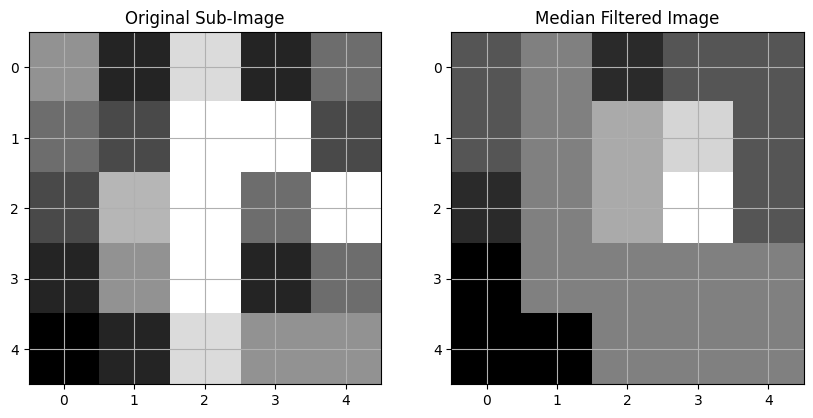

In [11]:
# Define the sub-image
sub_image = np.array([
    [4, 1, 6, 1, 3],
    [3, 2, 7, 7, 2],
    [2, 5, 7, 3, 7],
    [1, 4, 7, 1, 3],
    [0, 1, 6, 4, 4]
])

# Apply the 3x3 median filter
filtered_image = median_filter(sub_image, size=3)

# Plot the original and filtered images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axs[0].imshow(sub_image, cmap='gray', interpolation='none')
axs[0].set_title('Original Sub-Image')
axs[0].set_xticks(np.arange(sub_image.shape[1]))
axs[0].set_yticks(np.arange(sub_image.shape[0]))
axs[0].grid(True)

# Plot the filtered image
axs[1].imshow(filtered_image, cmap='gray', interpolation='none')
axs[1].set_title('Median Filtered Image')
axs[1].set_xticks(np.arange(filtered_image.shape[1]))
axs[1].set_yticks(np.arange(filtered_image.shape[0]))
axs[1].grid(True)

plt.show()


    Mean Filter: Averages the values within the filter window, leading to a smoothing effect that can blur edges and reduce noise but may introduce averaging artifacts.
    Median Filter: Takes the median value within the filter window, preserving edges better and being more robust to outliers or impulse noise.

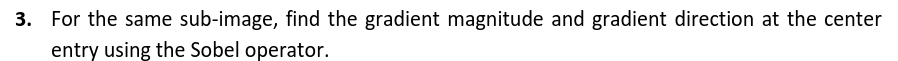

In [23]:
# Define the Sobel operators
sobel_x = 1/8 * np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = sobel_x.T
# Apply the Sobel operators
Gx = convolve(sub_image, sobel_x)
Gy = convolve(sub_image, sobel_y)

# Calculate the gradient magnitude and direction at the center entry (position [2, 2])
center_x = Gx[2, 2]
center_y = Gy[2, 2]

gradient_magnitude = np.sqrt(center_x**2 + center_y**2)
gradient_direction = np.arctan2(center_y, center_x) * (180 / np.pi)  # Convert to degrees

# Print the results
print("Gradient in x-direction at the center:", center_x)
print("Gradient in y-direction at the center:", center_y)
print("Gradient magnitude at the center:", gradient_magnitude)
print("Gradient direction at the center (degrees):", gradient_direction)

Gradient in x-direction at the center: 2
Gradient in y-direction at the center: 4
Gradient magnitude at the center: 4.47213595499958
Gradient direction at the center (degrees): 63.43494882292201


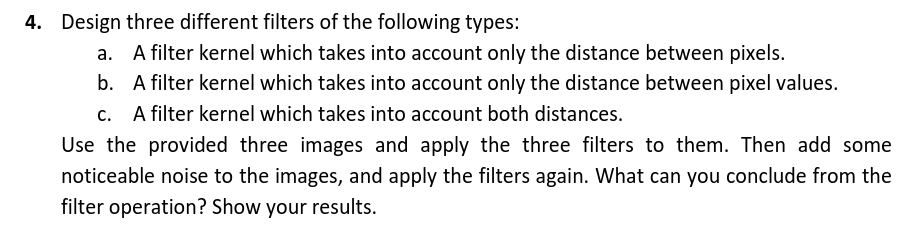

In [33]:

# Load the image
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))

# Define filter kernels
robert_x = 1/2 * np.array([
    [ 0,  0,  0],
    [-1,  0,  1],
    [ 0,  0,  0]
])

sobel_y = robert_x.T

prewitt_x = 1/6 * np.array([
    [-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1]
])

prewitt_y = prewitt_x.T

# Function to apply the filters
def apply_filters(image):
    Gx_roberts = convolve(image, robert_x)
    Gy_sobel = convolve(image, sobel_y)
    Gx_prewitt = convolve(image, prewitt_x)
    Gy_prewitt = convolve(image, prewitt_y)
    
    # Gradient magnitude for combined distances
    gradient_magnitude_prewitt = np.sqrt(Gx_prewitt**2 + Gy_prewitt**2)
    
    # Apply median filter
    median_filtered = median_filter(image, size=3)
    
    return Gx_roberts, Gy_sobel, gradient_magnitude_prewitt, median_filtered

# Plot the results
def plot_results(image, Gx_roberts, Gy_sobel, gradient_magnitude_prewitt, median_filtered):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Original image
    axs[0, 0].imshow(image, cmap='gray', interpolation='none')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')
    
    # Gradient in x-direction (Roberts)
    axs[0, 1].imshow(Gx_roberts, cmap='gray', interpolation='none')
    axs[0, 1].set_title('Gradient in X direction (Roberts)')
    axs[0, 1].axis('off')
    
    # Gradient in y-direction (Sobel)
    axs[0, 2].imshow(Gy_sobel, cmap='gray', interpolation='none')
    axs[0, 2].set_title('Gradient in Y direction (Sobel)')
    axs[0, 2].axis('off')
    
    # Gradient magnitude (Prewitt)
    axs[1, 0].imshow(gradient_magnitude_prewitt, cmap='gray', interpolation='none')
    axs[1, 0].set_title('Gradient Magnitude (Prewitt)')
    axs[1, 0].axis('off')
    
    # Median filtered image
    axs[1, 1].imshow(median_filtered, cmap='gray', interpolation='none')
    axs[1, 1].set_title('Median Filtered Image')
    axs[1, 1].axis('off')
    
    # Hide the empty subplot
    axs[1, 2].axis('off')
    
    plt.show()

# Load the image
for img_path in ['./images/Task1/cameraman.jpg', './images/Task1/house.jpg', './images/Task1/lena.jpg'] :
    image = load_image(img_path)

    # Apply filters
    Gx_roberts, Gy_sobel, gradient_magnitude_prewitt, median_filtered = apply_filters(image)

    # Plot results
    plot_results(image, Gx_roberts, Gy_sobel, gradient_magnitude_prewitt, median_filtered)

NameError: name 'Image' is not defined